**Columns description**
* track_id: The Spotify ID for the track
* track_name: Name of the track
* track_artist: The artists' names who performed the track
* album_name: The album name in which the track appears
* track_popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular
* track_album_id: Album unique ID
* track_album_name: Song album name
* track_album_release_date: Date when album released
* playlist_name: Name of playlist
* playlist_id: Playlist ID
* playlist_genre: Playlist genre
* playlist subgenre: Playlist subgenre 
* danceability: A measure of how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable.
* energy: Represents the intensity and activity within a track. Higher values indicate more energetic and fast-paced tracks.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
* loudness: The overall loudness of a track in decibels (dB)
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
* speechiness: Measures the presence of spoken words in a track compared to instrumental sounds. Higher values indicate tracks with more spoken words, like podcasts or audiobooks.
* acousticness: Measures the probability of a track being acoustic. Higher values indicate tracks closer to being purely acoustic.
* liveness: Indicates the presence of a live audience in the recording. Higher values suggest a higher likelihood of the track being performed live. 
* tempo: Represents the speed or pace of a track in beats per minute (BPM).
* duration_ms: Duration of song in milliseconds

**Data preprocessing and cleaning**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

df = pd.read_csv('spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [2]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [3]:
# Removing unnessecary columns according to business requirements
df.drop(columns=['track_id', 'key', 'loudness', 'mode', 'valence'], inplace=True)
df.head()

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,0.0583,0.1020,0.000000,0.0653,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,0.0373,0.0724,0.004210,0.3570,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,0.0742,0.0794,0.000023,0.1100,124.008,176616
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,0.1020,0.0287,0.000009,0.2040,121.956,169093
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,0.0359,0.0803,0.000000,0.0833,123.976,189052


In [4]:
# Converting 'duration_ms' column to 'duration_sec' according to business requirements
df['duration_sec'] = (df['duration_ms'] / 1000).round(1)
df.drop(columns='duration_ms', inplace=True)  
df.head()

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,duration_sec
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,0.0583,0.1020,0.000000,0.0653,122.036,194.8
1,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,0.0373,0.0724,0.004210,0.3570,99.972,162.6
2,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,0.0742,0.0794,0.000023,0.1100,124.008,176.6
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,0.1020,0.0287,0.000009,0.2040,121.956,169.1
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,0.0359,0.0803,0.000000,0.0833,123.976,189.1


In [5]:
# Renaming columns according to business requirements
new_column_names = {
    'track_name': 'track name',
    'track_artist': 'track artist',
    'track_album_id': 'track album id',
    'track_album_name': 'track album name',
    'track_album_release_date': 'track album release date',
    'playlist_name': 'playlist name',
    'playlist_id': 'playlist id',
    'playlist_genre': 'playlist genre',
    'playlist_subgenre': 'playlist subgenre',
    'duration_sec': 'duration in sec',
    'track_popularity': 'track popularity'
}

df.rename(columns=new_column_names, inplace=True)
df.columns

Index(['track name', 'track artist', 'track popularity', 'track album id',
       'track album name', 'track album release date', 'playlist name',
       'playlist id', 'playlist genre', 'playlist subgenre', 'danceability',
       'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'tempo', 'duration in sec'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track name                32828 non-null  object 
 1   track artist              32828 non-null  object 
 2   track popularity          32833 non-null  int64  
 3   track album id            32833 non-null  object 
 4   track album name          32828 non-null  object 
 5   track album release date  32833 non-null  object 
 6   playlist name             32833 non-null  object 
 7   playlist id               32833 non-null  object 
 8   playlist genre            32833 non-null  object 
 9   playlist subgenre         32833 non-null  object 
 10  danceability              32833 non-null  float64
 11  energy                    32833 non-null  float64
 12  speechiness               32833 non-null  float64
 13  acousticness              32833 non-null  float64
 14  instru

**Checking for null values**

In [7]:
df.isnull().sum()

track name                  5
track artist                5
track popularity            0
track album id              0
track album name            5
track album release date    0
playlist name               0
playlist id                 0
playlist genre              0
playlist subgenre           0
danceability                0
energy                      0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
tempo                       0
duration in sec             0
dtype: int64

Null values are observed in 'track name', 'track artist' and 'track album name' columns.

In [8]:
# Checking for null values in track_name, track_artist, track_album_name columns
df[df['track name'].isnull()]

,track name,track artist,track popularity,track album id,track album name,track album release date,playlist name,playlist id,playlist genre,playlist subgenre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,duration in sec
8151,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,southern hip hop,0.714,0.821,0.1760,0.0410,0.00000,0.1160,95.999,282.7
9282,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.678,0.659,0.3190,0.0534,0.00000,0.5530,146.153,202.2
9283,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.465,0.820,0.3070,0.0963,0.00000,0.0888,86.839,206.5
19568,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,reggaeton,0.675,0.919,0.0366,0.0606,0.00653,0.1030,97.017,252.8
19811,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,latin hip hop,0.714,0.821,0.1760,0.0410,0.00000,0.1160,95.999,282.7


The observed null values are present in the same rows in 'track name', 'track artist' and 'track album name' columns.

**Checking for outliers**

In [9]:
df.describe()

,track popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,duration in sec
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,0.107068,0.175334,0.084747,0.190176,120.881132,225.799397
std,24.984074,0.145085,0.180910,0.101314,0.219633,0.224230,0.154317,26.903624,59.833836
min,0.000000,0.000000,0.000175,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,24.000000,0.563000,0.581000,0.041000,0.015100,0.000000,0.092700,99.960000,187.800000
50%,45.000000,0.672000,0.721000,0.062500,0.080400,0.000016,0.127000,121.984000,216.000000
75%,62.000000,0.761000,0.840000,0.132000,0.255000,0.004830,0.248000,133.918000,253.600000
max,100.000000,0.983000,1.000000,0.918000,0.994000,0.994000,0.996000,239.440000,517.800000


The outliers observed are the MIN value in 'duration in sec' column and MIN value in 'tempo' column.

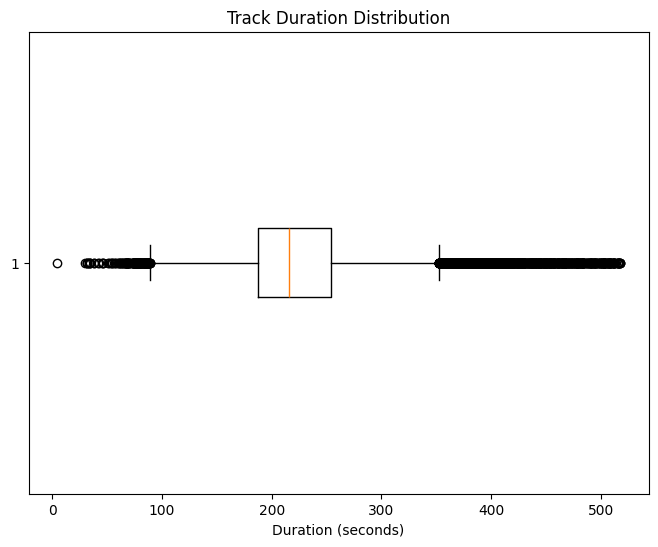

In [10]:
# Track duration distribution
plt.figure(figsize=(8, 6))
plt.boxplot(df['duration in sec'].dropna(), vert=False)
plt.xlabel('Duration (seconds)')
plt.title('Track Duration Distribution')
plt.show()

In [11]:
df[df['duration in sec'] == 4]

,track name,track artist,track popularity,track album id,track album name,track album release date,playlist name,playlist id,playlist genre,playlist subgenre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,duration in sec
11363,"Hi, How're You Doin'?",DREAMS COME TRUE,0,4wdK52JVu5GzhxW3RCZ3AV,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,album rock,0.0,0.315,0.0,0.0,0.0,0.0,0.0,4.0


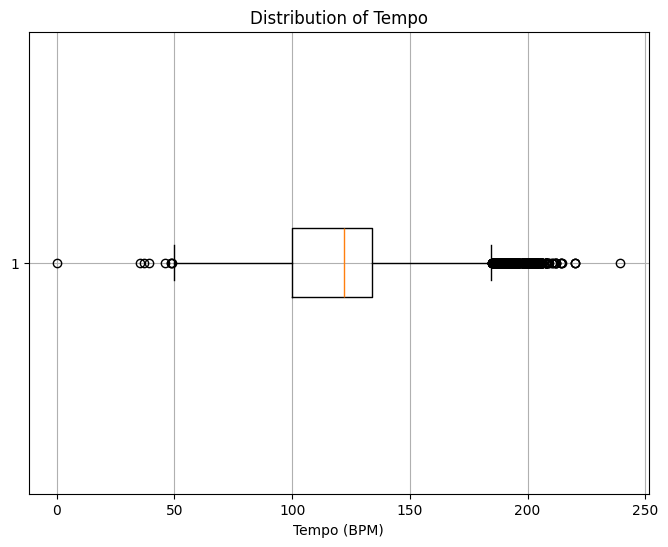

In [12]:
# Tempo distribution 
plt.figure(figsize=(8, 6))
plt.boxplot(df['tempo'].dropna(), vert=False)
plt.xlabel('Tempo (BPM)')
plt.title('Distribution of Tempo')
plt.grid(True)
plt.show()

Tempo: Represents the speed or pace of a track in beats per minute (BPM).

Normal Tempo Range: In typical musical compositions, tempos can range anywhere from very slow (e.g., ballads around 60 BPM) to very fast (e.g., some electronic dance music tracks reaching 180 BPM or more).

Anomaly at 0 BPM: A tempo value of 0 BPM is not a standard or plausible tempo for a musical piece. 
It's more likely that a tempo of 0 could represent missing or erroneous data, where the actual tempo value is unknown or not recorded.

In [13]:
df[df['tempo'] == 0]

,track name,track artist,track popularity,track album id,track album name,track album release date,playlist name,playlist id,playlist genre,playlist subgenre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,duration in sec
11363,"Hi, How're You Doin'?",DREAMS COME TRUE,0,4wdK52JVu5GzhxW3RCZ3AV,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,album rock,0.0,0.315,0.0,0.0,0.0,0.0,0.0,4.0


This is the same row with the 'duration in sec' outlier value. 

A removing of the row is suggested.

In [14]:
df = df[df['tempo'] != 0]

**Identidying and handling duplicates**

In [15]:
# Columns for identifying duplicates
columns_to_check = ['track name', 'track album release date', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration in sec']

# Finding fully duplicated rows based on specified columns
fully_duplicates = df[df.duplicated(subset=columns_to_check, keep=False)]
fully_duplicates = fully_duplicates.sort_values(by='track name')

# Displaying the fully duplicated rows
fully_duplicates.head()

,track name,track artist,track popularity,track album id,track album name,track album release date,playlist name,playlist id,playlist genre,playlist subgenre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,duration in sec
23318,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,Lil Dicky,69,5eLVoIPq7P3Bu29lVgD4x0,Professional Rapper,2015-07-31,Hip pop,1Sc7bobknESH7SXQcnmoX5,r&b,hip pop,0.858,0.697,0.2300,0.1140,0.0,0.2240,98.012,290.8
6148,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,Lil Dicky,69,5eLVoIPq7P3Bu29lVgD4x0,Professional Rapper,2015-07-31,Hip Hop Controller,37i9dQZF1DWT5MrZnPU1zD,rap,hip hop,0.858,0.697,0.2300,0.1140,0.0,0.2240,98.012,290.8
14503,'39 - 2011 Mix,Queen,60,75eP8LZolyNBpqIRyB5pvB,A Night At The Opera (Deluxe Edition 2011 Rema...,1975-11-21,I didn’t know perm stood for permanent (wave),3e6gYPyrTbaB8BWgSHCt5j,rock,permanent wave,0.524,0.571,0.0273,0.0271,0.0,0.1110,101.626,210.8
12103,'39 - 2011 Mix,Queen,46,1GbtB4zTqAsyfZEsm1RZfx,A Night At The Opera (2011 Remaster),1975-11-21,The Queen - La Discografia Completa,3E88dLx4fgFYY70gdGzdnB,rock,album rock,0.524,0.571,0.0273,0.0271,0.0,0.1110,101.626,210.8
8558,'Till I Collapse,Eminem,16,1ftvBBcu7jYIvXyt3JWB8S,The Eminem Show,2002-05-26,Gangster Rap,5joQabz9ys3XPGbSx5CaKv,rap,gangster rap,0.551,0.851,0.1970,0.0748,0.0,0.0784,171.411,297.9


* Fully duplicated rows were identified by 'track name', 'track album release date' columns and audio features columns.
* Tracks with the same names released in different years or by different artists are not considered duplicates as we take into consideration remastered tracks and covers.

In [16]:
# Remove duplicated rows
df = df.drop_duplicates(subset=columns_to_check, keep='first')

**Exploring genres and subgenres** 

In [17]:
df['playlist genre'].unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [18]:
df['playlist subgenre'].unique()

array(['dance pop', 'post-teen pop', 'electropop', 'indie poptimism',
       'hip hop', 'southern hip hop', 'gangster rap', 'trap',
       'album rock', 'classic rock', 'permanent wave', 'hard rock',
       'tropical', 'latin pop', 'reggaeton', 'latin hip hop',
       'urban contemporary', 'hip pop', 'new jack swing', 'neo soul',
       'electro house', 'big room', 'pop edm',
       'progressive electro house'], dtype=object)

In [19]:
# Mapping of genres to their corresponding subgenres
# Group subgenres by genre and collect them into a dictionary
genre_subgenre_mapping = df.groupby('playlist genre')['playlist subgenre'].unique().to_dict()

# Display the mapping of genres to subgenres
for genre, subgenres in genre_subgenre_mapping.items():
    print(f"Genre: {genre}, Subgenres: {', '.join(subgenres)}")

Genre: edm, Subgenres: electro house, big room, pop edm, progressive electro house
Genre: latin, Subgenres: tropical, latin pop, reggaeton, latin hip hop
Genre: pop, Subgenres: dance pop, post-teen pop, electropop, indie poptimism
Genre: r&b, Subgenres: urban contemporary, hip pop, new jack swing, neo soul
Genre: rap, Subgenres: hip hop, southern hip hop, gangster rap, trap
Genre: rock, Subgenres: album rock, classic rock, permanent wave, hard rock


The genre and subgenre columns were mapped to verify the correct distribution of values.

**Dealing with inconsistency in release date column**

In [20]:
df['track album release date'].value_counts().sort_index(ascending=True)

track album release date
1957-01-01      1
1957-03         1
1958-03-21      1
1960            4
1961-10-26      1
             ... 
2020-01-15     27
2020-01-16     16
2020-01-17    114
2020-01-20      1
2020-01-29      1
Name: count, Length: 4529, dtype: int64

In [21]:
try:
    pd.to_datetime(df['track album release date'], errors='raise')
except ValueError as e:
    print(f"Error: {e}")

Error: time data "2012" doesn't match format "%Y-%m-%d", at position 96. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


The 'track album release date' column has dates in different formats: '%Y-%m-%d', '%Y-%m', '%Y'.
Converting to unified format is necessary to perform further analysis.
Attempt to converting to datetime type results in NaT in values not in '%Y-%m-%d' format.

In [22]:
# Function to handle missing values and format dates
def format_dates(date):
    if pd.notnull(date):
        # If the date is in YYYY format, add '01-01' (January 1st)
        if len(date) == 4:
            return f"{date}-01-01"
        # If the date is in YYYY-MM format, add '-01' (first day of the month)
        elif len(date) == 7:
            return f"{date}-01"
        else:
            return date  # Return unchanged if already in YYYY-MM-DD format
    else:
        return pd.NaT  # Return NaN for missing values

df['track album release date'] = df['track album release date'].apply(format_dates)

df['track album release date'].head(10)

0    2019-06-14
1    2019-12-13
2    2019-07-05
3    2019-07-19
4    2019-03-05
5    2019-07-11
6    2019-07-26
7    2019-08-29
8    2019-06-14
9    2019-06-20
Name: track album release date, dtype: object

In [23]:
# Convert the 'track album release date' column to datetime
df['track album release date'] = pd.to_datetime(df['track album release date'])
df.dtypes

track name                          object
track artist                        object
track popularity                     int64
track album id                      object
track album name                    object
track album release date    datetime64[ns]
playlist name                       object
playlist id                         object
playlist genre                      object
playlist subgenre                   object
danceability                       float64
energy                             float64
speechiness                        float64
acousticness                       float64
instrumentalness                   float64
liveness                           float64
tempo                              float64
duration in sec                    float64
dtype: object

In [24]:
# Extract year and month in the format '%Y-%m'
df['track album release date'] = df['track album release date'].dt.strftime('%Y-%m')
df['track album release date'].head(10)

0    2019-06
1    2019-12
2    2019-07
3    2019-07
4    2019-03
5    2019-07
6    2019-07
7    2019-08
8    2019-06
9    2019-06
Name: track album release date, dtype: object

**EDA**

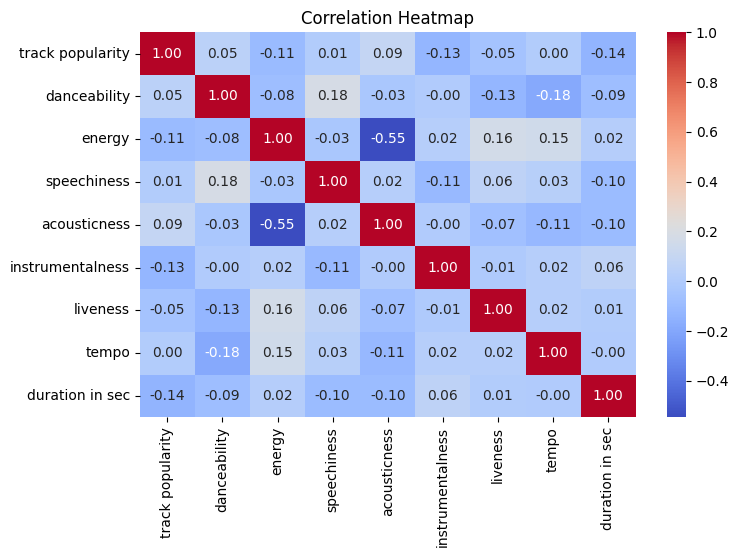

In [25]:
heatmap_data = df[['track popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration in sec']]

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Correlation matrix was created to investigate relationships between numeric values. 
No correlation was observed between variables.

**Identifying the most popular songs for each genre**

In [26]:
top_songs_by_genre = df.groupby('playlist genre').apply(lambda x: x.nlargest(10, 'track popularity')).reset_index(drop=True)
top_songs_by_genre.head()

,track name,track artist,track popularity,track album id,track album name,track album release date,playlist name,playlist id,playlist genre,playlist subgenre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,tempo,duration in sec
0,Surtada - Remix Brega Funk,Dadá Boladão,84,2zFE4Ze2DjkeZBMbbT4Mgj,Surtada (Remix Brega Funk),2019-09,Verão 2020 | Pop | Funk | Sertanejo | EDM | To...,5HmZtuuIDMtIy21kylqhx6,edm,pop edm,0.832,0.550,0.0587,0.2490,0.000008,0.182,154.064,152.8
1,A Gente Fez Amor - Ao Vivo,Gusttavo Lima,84,17jzAujoXwIF60ojew1yHU,O Embaixador in Cariri (Ao Vivo),2019-12,Verão 2020 | Pop | Funk | Sertanejo | EDM | To...,5HmZtuuIDMtIy21kylqhx6,edm,pop edm,0.793,0.937,0.0336,0.3660,0.000004,0.962,134.012,237.5
2,God Is A Dancer (with Mabel),Tiësto,82,2T0NPRcdhIt71ifDWm328R,God Is A Dancer (with Mabel),2019-09,Trance Party 2019 by FUTURE TRANCE,2yofeyPwe0ZNmJHTrGz2Qt,edm,big room,0.774,0.747,0.0820,0.0241,0.000006,0.342,119.964,168.1
3,3 Batidas - Ao Vivo,Guilherme & Benuto,82,2s2XNO2C38JP3NVOp8zkm4,3 Batidas (Ao Vivo),2019-08,Verão 2020 | Pop | Funk | Sertanejo | EDM | To...,5HmZtuuIDMtIy21kylqhx6,edm,pop edm,0.552,0.709,0.1290,0.6110,0.000000,0.763,117.582,157.2
4,"i hate u, i love u (feat. olivia o'brien)",gnash,81,3L0H4RjVXpEkwfDgi3XOdf,us,2016-03,EDM/POP,6gHk5RFrnALbDNJdaXKivi,edm,pop edm,0.492,0.275,0.3000,0.6870,0.000000,0.101,92.600,251.0


**Distribution of genres/subgenres**

In [27]:
genre_n_sub = (
    df.groupby(['playlist genre' ,'playlist subgenre'], as_index = False)
    .agg({'track name':'nunique'})
)
genre_n_sub['playlist genre'] = genre_n_sub['playlist genre'].str.title()
genre_n_sub['playlist subgenre'] = genre_n_sub['playlist subgenre'].str.title()

fig = px.sunburst(
    genre_n_sub, 
    path=['playlist genre', 'playlist subgenre'], 
    values='track name',
    title = 'Genre & Subgenre Group'
)
fig.show()

**Finding out the most productive artists**

In [28]:
artist = df['track artist'].value_counts().sort_values(ascending = False).reset_index().head(10)

fig = px.bar(artist,
            x='count',
            y='track artist',
            labels ={
                'track artist': 'Artist name',
                'count': 'Produced song'
            },
            color = 'track artist',
            title = 'Top artist by Produced song')
fig.show()

**Observing track releases over years**

In [29]:
df['track album release date'] = pd.to_datetime(df['track album release date'])

# Extracting year from the release date
df['release_year'] = df['track album release date'].dt.year

# Counting the number of track releases per year
yearly_track_counts = df['release_year'].value_counts().reset_index()
yearly_track_counts.columns = ['Year', 'Number of Track Releases']

# Creating a bar chart to display track releases over years
fig = px.bar(yearly_track_counts, x='Year', y='Number of Track Releases', 
             title='Track Releases Over Years', labels={'Number of Track Releases': 'Number of Releases'})
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Number of Track Releases')

fig.show()

**Discovering changes in track duration over time**

In [30]:
df['duration_min'] = df['duration in sec'] / 60

# Group by 'release_year' and calculate the average duration for each year
average_duration_by_year = df.groupby('release_year')['duration_min'].mean().reset_index()

# Plot the changes in average track duration over the years
fig = px.line(average_duration_by_year, x='release_year', y='duration_min', markers=True, labels={'release_year': 'Release Year', 'duration_min': 'Avg. Duration (min)'},
              title='Track Durarion Over the Years')
fig.show()

**Identifying seasonal trends in track releases**

In [31]:
df['release_month'] = pd.to_datetime(df['track album release date']).dt.month_name()

# Group by 'release_month' and calculate the total count of tracks for each month
tracks_by_month = df['release_month'].value_counts().reset_index(name='count')

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plot the seasonal trends using Plotly Express
fig = px.line(tracks_by_month, x=tracks_by_month.index, y='count',
              labels={'x': 'Month', 'count': 'Number of Tracks Released'},
              title='Seasonal Trends',
              line_shape='linear')

# Set the order of months on the x-axis
fig.update_xaxes(type='category', categoryorder='array', categoryarray=month_order)

# Explicitly set the x-axis labels
fig.update_xaxes(tickvals=list(range(len(month_order))), ticktext=month_order)

fig.show()